## Filtering Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

%matplotlib

In [2]:
%matplotlib inline

In [3]:
plt.rc('font', size=20)

In [4]:
import z_dependancy as z_dep

## 신호 생성하기

Text(0, 0.5, 'y')

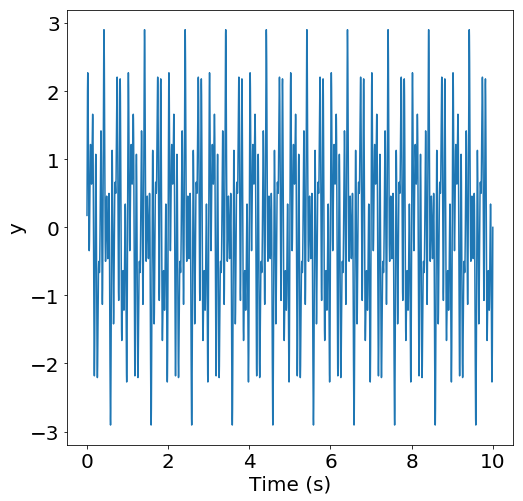

In [5]:
fs = 1000
T = 10

t =np.arange(1/fs,T+1/fs,1/fs)

w1 = 3
w2 = 10
w3 = 15

y1 = np.sin(2*np.pi*w1*t)
y2 = np.sin(2*np.pi*w2*t)
y3 = np.sin(2*np.pi*w3*t)
y = y1+y2+y3

plt.figure(figsize=(8,8))
plt.plot(t,y);
plt.xlabel('Time (s)')
plt.ylabel('y')

## 주파수 분석하기

(0, 50)

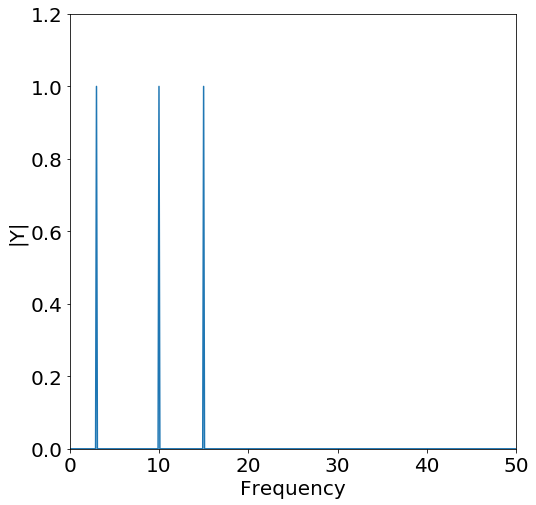

In [7]:
f, A = z_dep.z_fft_simple(y,fs)

plt.figure(figsize=(8,8))
plt.plot(f,A)
plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.ylim([0,1.2])
plt.xlim([0,50])

## 필터링하기

In [8]:
Fn=fs/2;
n=10; #filter order

### Band-pass

In [9]:
ftype='band'
Wn=np.array([5,12])
print(Wn)

[ 5 12]


In [10]:
[z,p,k] = signal.butter(n,Wn/Fn,btype=ftype,output='zpk')

sos = signal.zpk2sos(z,p,k); #g is same as k
sos[0,0:3]=sos[0,0:3]/k 

y_filter = signal.sosfilt(sos,y)*k

(0, 50)

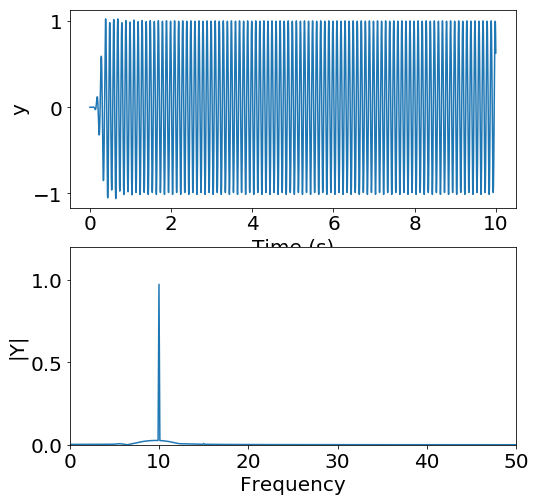

In [11]:
f_low, A_low = z_dep.z_fft_simple(y_filter,fs)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(t,y_filter);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212);
plt.plot(f_low,A_low);plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.ylim([0,1.2]);plt.xlim([0,50])

### High-pass

In [12]:
ftype='high'
Wn=np.array([5])
print(Wn)

[5]


In [13]:
[z,p,k] = signal.butter(n,Wn/Fn,btype=ftype,output='zpk')

sos = signal.zpk2sos(z,p,k); #g is same as k
sos[0,0:3]=sos[0,0:3]/k 

y_filter = signal.sosfilt(sos,y)*k

(0, 50)

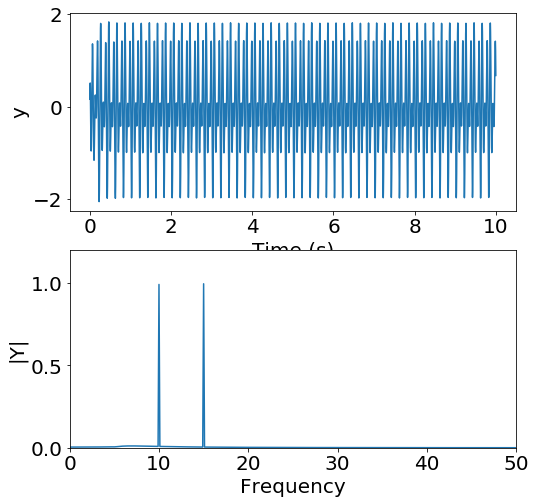

In [14]:
f_low, A_low = z_dep.z_fft_simple(y_filter,fs)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(t,y_filter);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212);
plt.plot(f_low,A_low);plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.ylim([0,1.2]);plt.xlim([0,50])

### Los-pass

In [15]:
ftype='low'
Wn=np.array([5])
print(Wn)

[5]


In [16]:
[z,p,k] = signal.butter(n,Wn/Fn,btype=ftype,output='zpk')

sos = signal.zpk2sos(z,p,k); #g is same as k
sos[0,0:3]=sos[0,0:3]/k 

y_filter = signal.sosfilt(sos,y)*k

(0, 50)

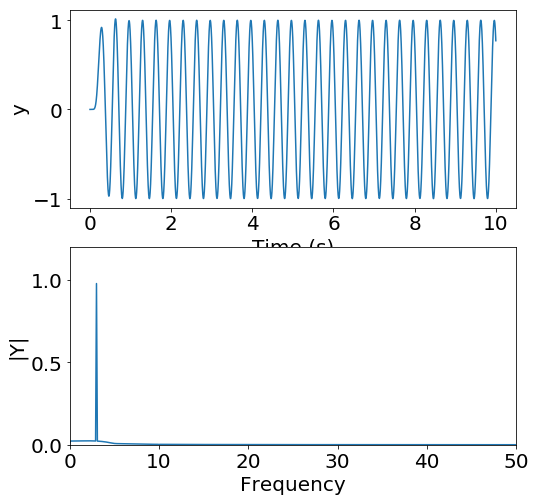

In [17]:
f_low, A_low = z_dep.z_fft_simple(y_filter,fs)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(t,y_filter);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212);
plt.plot(f_low,A_low);plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.ylim([0,1.2]);plt.xlim([0,50])